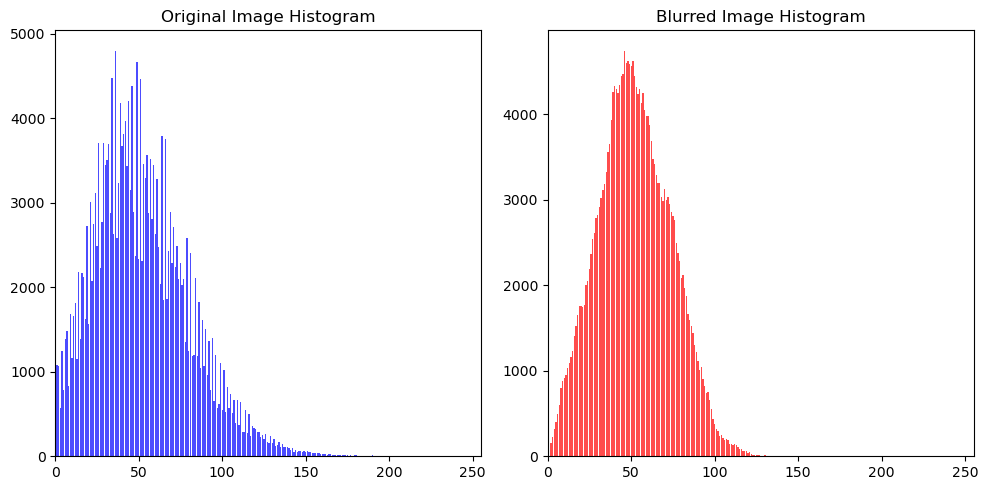

KS Statistic: 0.43359375
P-value: 5.423052373923453e-22
The two histograms are significantly different.


In [3]:
# This script resizes an image to a 500x500 PNG image, converts it to greyscale, applies a Gaussian blur, calculates the histograms
# of the original and blurred images, plots them, performs a statistical test to compare the histograms, 
# and saves the blurred image and a downsized version of it. 

#Import necessary libraries
import os
from PIL import Image, ImageFilter
import matplotlib.pyplot as plt 
from scipy.stats import ks_2samp

# Build the path relative to the current script
base_dir = os.getcwd()
image_path = os.path.join(base_dir,'5nM MinE07 on PC9 .png')

# Read a PNG image and rescale it to 500x500 pixels if necessary
image = Image.open(image_path)
if image.size != (500, 500): 
    image = image.resize((500, 500))
image.show()
# check if the image is in greyscale mode, if not, convert it to greyscale
if image.mode != 'L':
    image = image.convert('L')    

# apply a Gaussian blur with a radius of 5 pixels                       
blurred_image = image.filter(ImageFilter.GaussianBlur(radius=5))


# show the blurred image
blurred_image.show()

# calculate the greyscale histogram of the blurred image and the original image
original_histogram = image.histogram()
blurred_histogram = blurred_image.histogram()  

#plot the histograms on a single matplotlib plot
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title('Original Image Histogram')
plt.bar(range(256), original_histogram, color='blue', alpha=0.7)
plt.xlim([0, 255])
plt.subplot(1, 2, 2)
plt.title('Blurred Image Histogram')
plt.bar(range(256), blurred_histogram, color='red', alpha=0.7)
plt.xlim([0, 255])
plt.tight_layout()
plt.show()

#use scipy on histograms to test statistical significance between the two
statistic, p_value = ks_2samp(blurred_histogram, original_histogram)
# print the results
print(f"KS Statistic: {statistic}")  
print(f"P-value: {p_value}")

# interpret the p-value
if p_value < 0.05:
    print("The two histograms are significantly different.")
else:
    print("The two histograms are not significantly different.")

# save the blurred image
blurred_image.save('blurred_image.png')

#save a downsizeded version of the blurred image
downsized_image = blurred_image.resize((250, 250), Image.Resampling.LANCZOS)
downsized_image.save('downsized_blurred_image.png') 


                                                                                            
